### This is the second part:  data processing and analysis.

### Here are my research questions:
#### 1. What's the rating distribution? What's the proportion of different rating?
#### 2. How the readers are geographically distributed？
#### 3. What are the most frequent words in reviews?

In [61]:
# insert libraries for analysing data
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import wordcloud
from wordcloud import WordCloud, STOPWORDS

In [62]:
df = pd.read_csv('reviews.csv')
df.info()

# As we can see, there are values missing in review colunm.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2760 entries, 0 to 2759
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   name    2760 non-null   object
 1   date    2760 non-null   object
 2   rating  2760 non-null   object
 3   title   2760 non-null   object
 4   review  2748 non-null   object
dtypes: object(5)
memory usage: 107.9+ KB


In [63]:
# We can delete missing values using dropna()
df.dropna(inplace=True)
df

,name,date,rating,title,review
0,Kristine D. Pedersen,Reviewed in the Netherlands on 16 January 2023,5.0 out of 5 stars,Heart wrenching story,Heart wrenching story about the involvement of...
1,Laura,Reviewed in the Netherlands on 15 January 2023,5.0 out of 5 stars,Fantastic book!,You just feel his emotions throughout this boo...
2,Lydia,Reviewed in the Netherlands on 14 January 2023,5.0 out of 5 stars,"Honest, heartbreaking, and courageous",What a touching and courageous life story. It ...
3,J,Reviewed in the United Kingdom on 17 January 2023,4.0 out of 5 stars,Completely Heartbreaking,Just finished reading this and oh my god! I bo...
4,Jill,Reviewed in the United States on 21 January 2023,4.0 out of 5 stars,Darling Boy,Potential spoiler alerts: This book was a fas...
...,...,...,...,...,...
2755,Alice Carey,Reviewed in the United States on 13 January 2023,3.0 out of 5 stars,Questionable timing,The book is a compelling read. Loss is not con...
2756,JeffK,Reviewed in the United States on 10 January 2023,5.0 out of 5 stars,It takes courage to tell your story,"Powerfully written, loads of insight I highly..."
2757,Sylvine,Reviewed in Canada on 17 January 2023,5.0 out of 5 stars,Worthwhile Read,I enjoyed reading this and found it difficult ...
2758,Amazon Customer,Reviewed in the United Kingdom on 11 January 2023,5.0 out of 5 stars,"Authentic, needed and surprising",I had to leave a review as How else can we let...


In [64]:
# By observing, we find that the date column is mixed with date and country
# So we can extract country from this column by lambda
df['date'] = df.apply(lambda x: x['date'].replace(' the ', ' '), axis=1)
df['country'] = df.apply(lambda x: x['date'].split(' on')[0].split('in ')[1], axis=1)
df['time'] = df.apply(lambda x: x['date'].split('on ')[1], axis=1)
df['rating'] = df.apply(lambda x: float(x['rating'].split(' ')[0]), axis=1)
df

,name,date,rating,title,review,country,time
0,Kristine D. Pedersen,Reviewed in Netherlands on 16 January 2023,5.0,Heart wrenching story,Heart wrenching story about the involvement of...,Netherlands,16 January 2023
1,Laura,Reviewed in Netherlands on 15 January 2023,5.0,Fantastic book!,You just feel his emotions throughout this boo...,Netherlands,15 January 2023
2,Lydia,Reviewed in Netherlands on 14 January 2023,5.0,"Honest, heartbreaking, and courageous",What a touching and courageous life story. It ...,Netherlands,14 January 2023
3,J,Reviewed in United Kingdom on 17 January 2023,4.0,Completely Heartbreaking,Just finished reading this and oh my god! I bo...,United Kingdom,17 January 2023
4,Jill,Reviewed in United States on 21 January 2023,4.0,Darling Boy,Potential spoiler alerts: This book was a fas...,United States,21 January 2023
...,...,...,...,...,...,...,...
2755,Alice Carey,Reviewed in United States on 13 January 2023,3.0,Questionable timing,The book is a compelling read. Loss is not con...,United States,13 January 2023
2756,JeffK,Reviewed in United States on 10 January 2023,5.0,It takes courage to tell your story,"Powerfully written, loads of insight I highly...",United States,10 January 2023
2757,Sylvine,Reviewed in Canada on 17 January 2023,5.0,Worthwhile Read,I enjoyed reading this and found it difficult ...,Canada,17 January 2023
2758,Amazon Customer,Reviewed in United Kingdom on 11 January 2023,5.0,"Authentic, needed and surprising",I had to leave a review as How else can we let...,United Kingdom,11 January 2023


In [65]:
# Then we can delete the original date column which has been replaced by country and time columns.

df.drop('date', axis=1, inplace=True)

In [66]:
df

,name,rating,title,review,country,time
0,Kristine D. Pedersen,5.0,Heart wrenching story,Heart wrenching story about the involvement of...,Netherlands,16 January 2023
1,Laura,5.0,Fantastic book!,You just feel his emotions throughout this boo...,Netherlands,15 January 2023
2,Lydia,5.0,"Honest, heartbreaking, and courageous",What a touching and courageous life story. It ...,Netherlands,14 January 2023
3,J,4.0,Completely Heartbreaking,Just finished reading this and oh my god! I bo...,United Kingdom,17 January 2023
4,Jill,4.0,Darling Boy,Potential spoiler alerts: This book was a fas...,United States,21 January 2023
...,...,...,...,...,...,...
2755,Alice Carey,3.0,Questionable timing,The book is a compelling read. Loss is not con...,United States,13 January 2023
2756,JeffK,5.0,It takes courage to tell your story,"Powerfully written, loads of insight I highly...",United States,10 January 2023
2757,Sylvine,5.0,Worthwhile Read,I enjoyed reading this and found it difficult ...,Canada,17 January 2023
2758,Amazon Customer,5.0,"Authentic, needed and surprising",I had to leave a review as How else can we let...,United Kingdom,11 January 2023


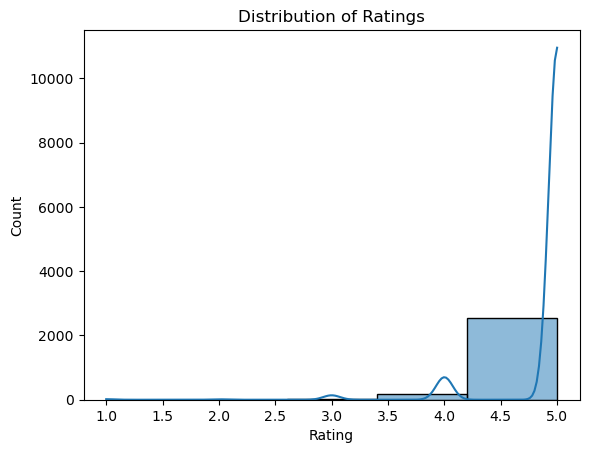

In [67]:
# Visualization 1: Rating Distribution
sns.histplot(data=df, x='rating', bins=5, kde=True)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

# This creates a histogram using Seaborn to visualize the distribution of ratings in the user reviews datase.
# The histogram is divided into five bins (one for each possible rating value.
# x-axis shows the rating values, and the y-axis shows the count of reviews that fall into each rating value bin.
# As we can see, most reviews focus on 5, but I'm also interested what proportion does it take.

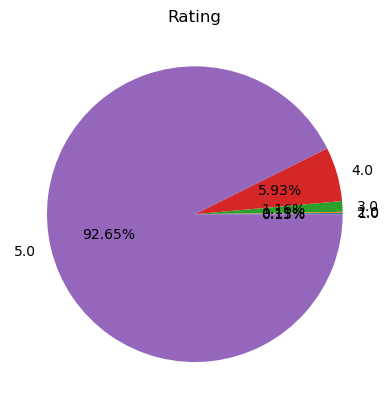

In [68]:
# We can use Matplotlib to see the proportion of the reviews to have more insights:

data = df.groupby('rating')['rating'].count()
labels = data.index
y = data.values
plt.pie(y, labels=labels, autopct="%0.2f%%")
plt.title('Rating')
plt.show()
# 92.68% of ratings are in 5/5.

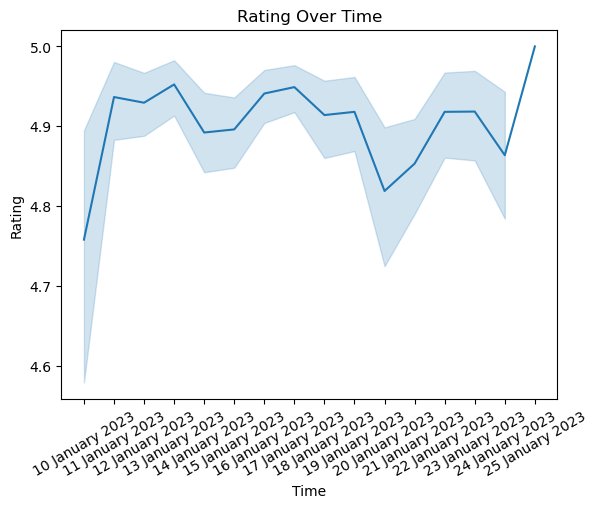

In [69]:
# Visualization 2: Rating vs. Date
df = df.sort_values('time')
# rank df in the time order to see the change over time
sns.lineplot(data=df, x='time', y='rating')
plt.title('Rating Over Time')
plt.xlabel('Time')
plt.ylabel('Rating')
plt.xticks(rotation=30)
plt.show()
# From 10 January 2023 when the book published, to 25 January 2023, the rating trend is fluctuating.

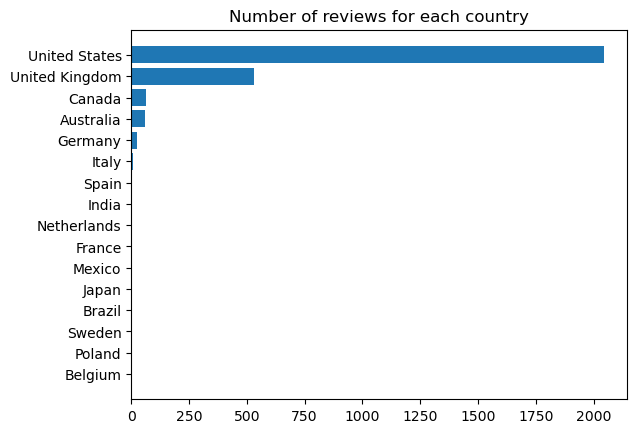

In [70]:
#  Where the reviewers come from? 

data = df.groupby('country')['country'].count()
data.sort_values(inplace=True)
x = data.index
y = data.values
plt.barh(x, y)
plt.title('Number of reviews for each country')
plt.show()
# Interestingly, we can find it that American reviewers are more fascinated by the prince of Britian than UK citizens.

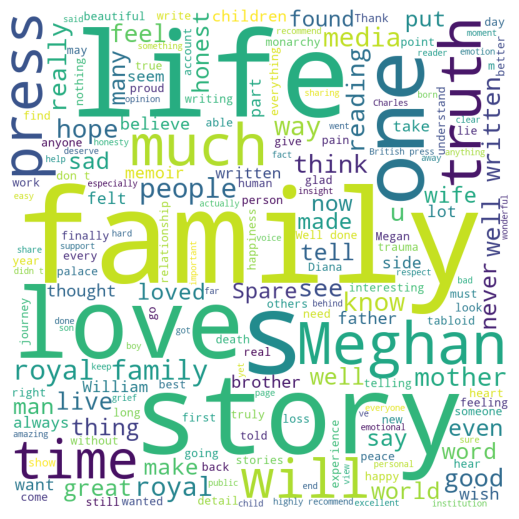

In [71]:
# Finally we use wordcloud to generate word cloud to see what are most used words.
## Visualization 4: Word Cloud of Reviews

stopwords = set(STOPWORDS)
stopwords.update(['book', 'harry','read','prince'])
# delete possible unwanted uninformative word by setting them as stop words
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(' '.join(df['review']))
plt.figure(figsize = (5, 5), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

plt.show()

# The most frequent words are family, story, love and life.